# Clustering

Eine weitere nützliche Anwendung aus dem Bereich des unüberwachten Lernens ist das Clustering. Beim Clustering geht es darum, die Daten in Untergruppen zu unterteilen, wobei die Mitglieder jeder Gruppe möglichst ähnlich zu den eigenen Gruppenmitgliedern und möglichst verschieden zu Mitgliedern anderer Gruppen sein sollen. Die Ähnlichkeit paarweiser Beobachtungen wird anhand aller Variablen evaluiert. In den unteren beiden Zellen sehen wir die ersten Beobachtungen eines Datensatzes mit zwei Variablen $x_1, x_2$. Insgesamt hat dieser künstlich erzeugte Datensatz $300$ Beobachtungen, welches sich realtiv eindeutig in drei Cluster unterteilen lassen. In der Grafik sehen wir links, wie die Daten ohne Clusterzuteilung aussehen würden. In diesem Fall können wir die Aufteilung in drei Cluster relativ gut identifizieren. Sobald wir es jedoch mit mehr als $3$ Variablen in einem Datensatz zu tun haben, entfällt die Möglichkeit der visuellen Aufteilung. Zudem lassen sich reale Daten meist nicht so einfach und klar getrennt in Cluster unterteilen. Um Daten möglichst gut in ähnliche und unähnliche Beobachtungen unterteilen zu können, benötigen wir zunächst eine oder mehrere Kennzahlen, wie die Ähnlichkeit quantifiziert werden kann. Von dieser ausgehen, existieren verschiedene Methoen des Clustering, wobei wir uns in diesem Kapitel exemplarisch die Algorithmen des K-means und des hierarchischen Clustering ansehen werden. Beide Algorithmen eignen sich gut, um die Prinzipien des Clustering zu verstehen, da das gewählte Vorgehen relativ intuitiv und vergleichsweise einfach nachvollziehbar ist. 

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pylab as plt
import pandas as pd

X, clusters = make_blobs(n_samples=300, n_features=2, centers=3, random_state=42, cluster_std=2)
df = pd.DataFrame(X, columns=["x_1", "x_2"])
df.loc[:, "cluster"] = clusters
df.head()

,x_1,x_2,cluster
0,-7.798349,-8.579798,2
1,-8.600454,-7.649221,2
2,-0.864108,6.572599,0
3,4.204516,4.170723,1
4,-10.955876,-8.896282,2


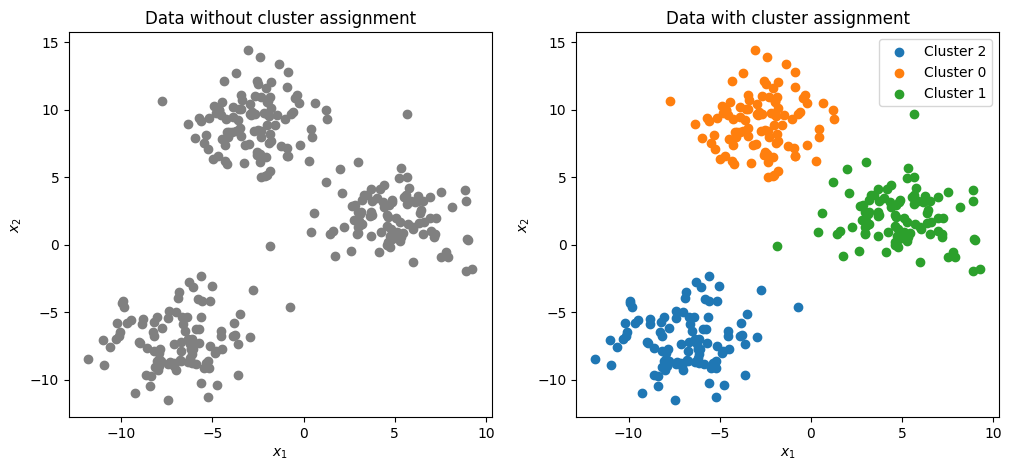

In [2]:
fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].scatter(df.x_1, df.x_2, c = "grey")
for cluster in df.cluster.unique():
    df_tmp = df[df.cluster == cluster]
    axs[1].scatter(df_tmp.x_1, df_tmp.x_2, label = f"Cluster {cluster}")

axs[0].set_title("Data without cluster assignment")
axs[1].set_title("Data with cluster assignment")
axs[0].set_xlabel(r"$x_1$")
axs[0].set_ylabel(r"$x_2$")
axs[1].set_xlabel(r"$x_1$")
axs[1].set_ylabel(r"$x_2$")
axs[1].legend()

plt.show()

## Ähnlichkeit von Beobachtungen

Ganz allgemein haben wir es beim Clustering mit einem Datensatz von $n$ Beobachtungen gemessen an $p$ Variablen zu tun. Zwei Beobachtungen $\boldsymbol{x}_i, \boldsymbol{x}_l$ sind somit durch:

$$
\boldsymbol{x}_i = 
\begin{pmatrix}
x_{i1} \\
x_{i2} \\
\vdots \\
x_{ip} \\
\end{pmatrix} ~~~
\boldsymbol{x}_l = 
\begin{pmatrix}
x_{l1} \\
x_{l2} \\
\vdots \\
x_{lp} \\
\end{pmatrix}
$$

beschrieben. Da es sich um bei den beiden Beobachtungen um Vektoren handelt, könnte man den Abstand zwischen den Vektoren als deren Ähnlichkeit bzw. Unterschiedlichkeit verwenden. Der Abstand kann durch den euklidischen Abstand quantifiziert. Dieser ist mit:

$$
d \left(\boldsymbol{x}_i, \boldsymbol{x}_l \right) = \sqrt{ \sum_{j=1}^p \left(x_{ij} - x_{lj}\right)^2 }
$$

definiert. In der unteren Grafik betrachten wir drei Beobachtungen eines Datensatzes mit zwei Variablen. Die Daten sind mit folgenden Werten gegeben und wie in der folgenden Zelle visualisiert.

In [3]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np


X = np.array([[0.5, 2], [1, 1], [2, 5]])
df = pd.DataFrame(X, columns = ["x_1", "x_2"], index = ["A", "B", "C"])
df.head()

,x_1,x_2
A,0.5,2.0
B,1.0,1.0
C,2.0,5.0


Text(0, 0.5, '$x_2$')

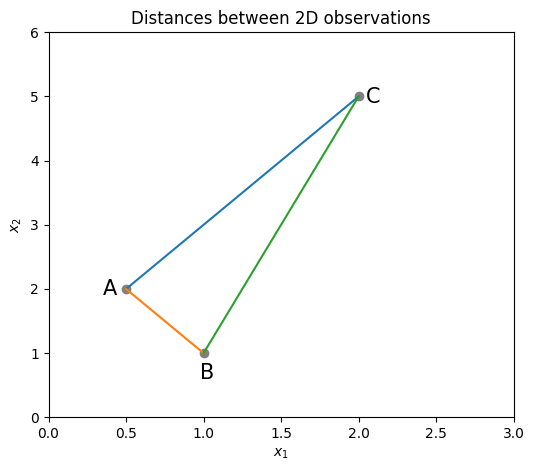

In [4]:
fig, ax = plt.subplots(figsize = (6, 5))
ax.scatter(X[:, 0], X[:, 1], c = "grey")
ax.plot([0.5, 2], [2, 5])
ax.plot([1, 0.5], [1, 2])
ax.plot([1, 2], [1, 5])
ax.text(0.35, 1.9, "A", size = 15)
ax.text(0.975, 0.6, "B", size = 15)
ax.text(2.05, 4.9, "C", size = 15)
ax.set_xlim((0, 3))
ax.set_ylim((0, 6))

ax.set_title("Distances between 2D observations")
ax.set_xlabel(r"$x_1$")
ax.set_ylabel(r"$x_2$")
plt.show()

Berechnen wir für jedes Paar den euklidischen Abstand, resultieren folgende Werte:

In [5]:
from sklearn.metrics.pairwise import euclidean_distances

pd.DataFrame(euclidean_distances(df), columns = ["A", "B", "C"], index = ["A", "B", "C"]).round(4)

,A,B,C
A,0.0000,1.1180,3.3541
B,1.1180,0.0000,4.1231
C,3.3541,4.1231,0.0000


Hätten wir das Ziel diese drei Datenpunkte in zwei Cluster zu unterteilen, wäre es intuitiv, die Datenpunkte A und B einen Cluster und den Datenpunkt C einen anderen Cluster zuzuordnen, da die Ähnlichkeit (euklidische Nähe) zwischen A und B relativ hoch, jedoch die Nähe zwischen A und C sowie B und C relativ gering ist. Während wir (bzw. ich) diese Zuordnung zwar basierend auf dem euklidischen Abstand durchgeführt habe, erfolgte die Zuteilung manuell. Aufgabe von Clusteralgorithmen ist es, diese Zuteilung automatisiert, sinnvoll und nachvollziehbar durchzuführen. Jedoch muss hierbei nicht immer auf den euklidischen Abstand zurück gegriffen werden. Weitere Beispiele wären die Cosine-Similarity oder die Manhatten-Similarity. Je nach Art der Daten existieren hierbei verschiedene Vor- und Nachteile. Im Allgeminen gilt für alle Abstands- bzw. Ähnlichkeitsmetriken:

* Der Wert ist $\geq 0$
* Ein Wert von $0$ impliziert, dass es sich um die selbe Beobachtung handelt
* Es ist irrelevant, in welcher Richtung der Abstand gemessen wird

Mathematisch ausgedrückt, gilt für jedes Abstandsmaß $d\left( \boldsymbol{x}_i, \boldsymbol{x}_l \right)$:

* $d\left( \boldsymbol{x}_i, \boldsymbol{x}_l \right) \geq 0 $ (Nicht-Negativität)
* $d\left( \boldsymbol{x}_i, \boldsymbol{x}_l \right) = 0 \text{ nur falls } \boldsymbol{x}_i = \boldsymbol{x}_l$ (Positiv definit)
* $d\left( \boldsymbol{x}_i, \boldsymbol{x}_l \right) = d\left( \boldsymbol{x}_l, \boldsymbol{x}_i \right)$ (Symmetrie bzw. Kommutativität)
* $d\left( \boldsymbol{x}_i, \boldsymbol{x}_l \right) \leq d\left( \boldsymbol{x}_i, \boldsymbol{x}_k \right) + d\left( \boldsymbol{x}_k, \boldsymbol{x}_l \right)$ (Dreiecks Ungleicheit)

## K-means Clustering

Beim K-means Clustering wird zunächst manuell die Anzahl $K$ der Cluster festgelegt. Die Clusterzuteilung $C_k$ für den Cluster $k$ ist die Menge der Datenpunkte im entsprechenden Cluster. Sind beispielsweise $10$ Datenpunkte in einem Datensatz enthalten, könnte eine Zuteilung für $k = 3$ so:

$$
\begin{align}
C_1 = & \lbrace \boldsymbol{x}_4, \boldsymbol{x}_6, \boldsymbol{x}_8, \boldsymbol{x}_{10} \rbrace \\
C_2 = & \lbrace \boldsymbol{x}_2, \boldsymbol{x}_5, \boldsymbol{x}_7 \rbrace \\
C_3 = & \lbrace \boldsymbol{x}_1, \boldsymbol{x}_3, \boldsymbol{x}_9 \rbrace \\
\end{align}
$$

aussehen. Ziel des Algorithmus ist es diese Zuteilung so vorzunehmen, dass die durchschnittliche Summe der paarweisen Abstände innerhalb der jeweiligen Cluster möglichst gering ist. Zur Quantifizierung wird der quadrierte euklidische Abstand verwendet. Innerhalb eines Clusters ist die durchschnittliche Summe aller paarweisen quadrierten euklidischen Abstände definiert durch:

$$
W \left( C_k \right) = \frac{1}{|C_k|} \sum_{i, l \in C_k} \sum_{j = 1}^p \left( x_{ij} - x_{lj} \right)^2
$$

definiert. $|C_k|$ ist die Menge aller Beobachtungen im Cluster $k$. Mit Hilfe dieser Definition können wir die Lossfunktion des K-means Clustering durch:

$$
L\left( C_1, ..., C_k, X \right) = \sum_{k = 1}^K W \left( C_k \right) = \sum_{k = 1}^K \frac{1}{|C_k|} \sum_{i, l \in C_k} \sum_{j = 1}^p \left( x_{ij} - x_{lj} \right)^2
$$

definieren. Da es für die Minimierung der Lossfunktion keine analytische Lösung gibt, wird die Lossfunktion durch iteratives Vorgehen minimiert. Hierbei geht der K-means Algorithmus wie folgt vor:


```{prf:algorithm} K-means Clustering
1. Jeder Beobachtung wird zu Beginn zufällig ein Cluster zugeteilt.
2. Führe folgende Schritte solange durch, bis sich die Clusterzuordnungen nicht mehr verändern:
    1. Bestimme für jeden Cluster den Schwerpunkt. Der Clusterschwerpunkt des Clusters $k$ ist der Vektor mit den durchschnittlichen Realisierungen der jeweiligen Merkmale aller Beobachtungen innerhalb des Clusters.
    2. Teile die Beobachtungen jeweils dem Cluster zu, zu dessen Schwerpunkt die Beobachtung den geringsten Abstand hat.
```


In der folgenden Zellen führen wir den Algorithmus über zwei Iterationsschritte durch. Wir können gut erkennen, dass sich nach der zufälligen Initialisierung relativ schnell passende Cluster finden und sich die Clusterschwerpunkte weiter voneinander entfernen. Ein in der Praxis kritischer Aspekt ist die Sensitivität des Algorithmus gegenüber der zu Beginn durchgeführten zufälligen Zuordnung. Zudem sollten die Cluster durch die jeweiligen Schwerpunkte charakterisiert und verglichen werden. Läuft der Algorithmus mehrfach kann beispielsweise der Cluster mit dem gleichen Schwerpunkt einmal als Cluster $C_0$ und beim nächsten Mal als Cluster $C_2$ benannt werden. Diese Zuteilung ist beliebig, die gefundenen Schwerpunkte hingegen sind charakteristisch. Zudem ist wichtig zu wissen, dass die Daten vor dem Clustering normiert werden sollten, da der euklidische Abstand bzw. der quadrierte euklidische Abstand ansonsten stärker durch die Variable mit den höheren numerischen Werten beeinflusst ist. Sind die Werte zweier Merkmals beispielsweise im Bereich $[0, 1]$ und $[0, 1000]$, so würde z.B. ein Abstand von $10^2$ des zweiten Merkmals die Quantifizierung des euklidischen Abstands im Vergleich zum maximalen Abstand $1^2$ des ersten Merkmals dominieren, obwohl dieser in Relation zur gesamten numerischen Reichweite vermutlich als relativ gering einzuschätzen ist.

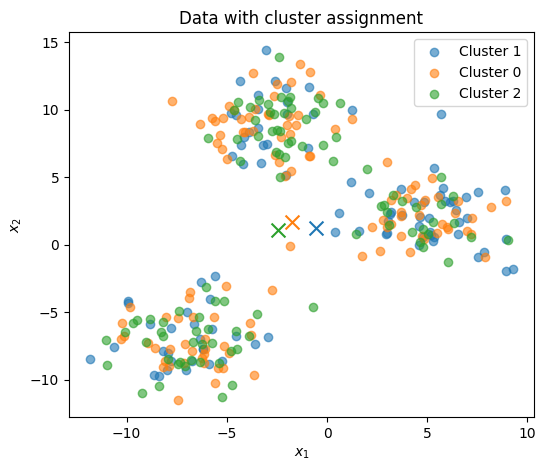

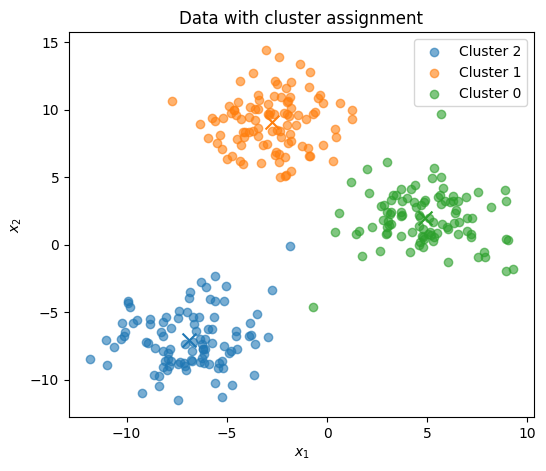

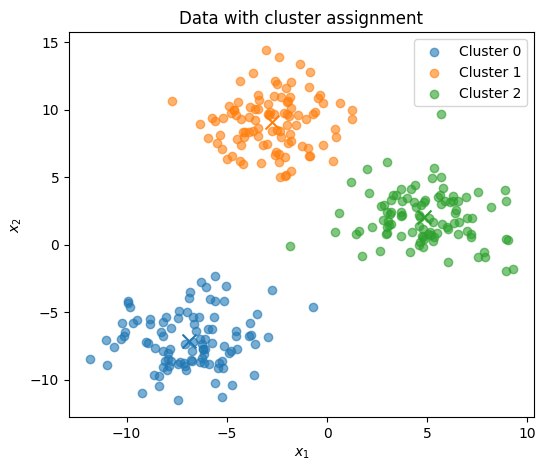

In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pylab as plt
import pandas as pd
import random


colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
X, clusters = make_blobs(n_samples=300, n_features=2, centers=3, random_state=42, cluster_std=2)
df = pd.DataFrame(X, columns=["x_1", "x_2"])
random.seed(42)
df.loc[:, "est_cluster"] = random.choices([0, 1, 2], k = df.shape[0])

for i in range(3):
    cluster_centroids = []

    for cluster in df.est_cluster.unique():
        df_tmp = df[df.est_cluster == cluster]
        df_tmp = df_tmp.drop(["est_cluster"], axis = 1)
        cluster_centroids.append(df_tmp.mean())
    cluster_centroids = np.array(cluster_centroids)

    fig, ax = plt.subplots(figsize = (6, 5))
    for i, cluster in enumerate(df.est_cluster.unique()):
        df_tmp = df[df.est_cluster == cluster]
        ax.scatter(df_tmp.x_1, df_tmp.x_2, label = f"Cluster {cluster}", c = colors[i], alpha = 0.60)
        ax.scatter(cluster_centroids[i][0], cluster_centroids[i][1], marker = "x", c = colors[i], s = 100)

    ax.set_title("Data with cluster assignment")
    ax.set_xlabel(r"$x_1$")
    ax.set_ylabel(r"$x_2$")
    ax.legend()

    plt.show()

    df.loc[:, "est_cluster"] = np.argmin(euclidean_distances(df.drop(["est_cluster"], axis = 1).values, cluster_centroids), axis = 1)



Nach erfolgter Clusterzuteilung stellt sich für den K-means Algorithmus die Frage nach dem besten Wert für $K$. Hierzu muss die jeweils gefundene Aufteilung in ihrer Güte quantifziert und mit den anderen Aufteilungen verglichen werden. Ein Beispiel für ein entsprechendes Maß ist der Silhouette Score einer Beobachtung. Hierbei wird einerseits der durchschnittliche quadrierte euklidische Abstand der $i$-ten Beobachtung zu allen übrigen Beobachtungen innerhalb des Clusters von $i$ bestimmt.

$$
a(i) = \frac{1}{| C_k| - 1} \sum_{l \in C_k, l \neq i} \sum_{j = 1}^p \left( x_{ij} - x_{lj} \right)^2, i \in C_k
$$

Zudem wird der durchschnittliche quadrierte euklidische Abstand der $i$-ten Beobachtung zum nächstgelegenen Cluster ermittelt:

$$
b(i) = \min_{C_q} \frac{1}{| C_q| - 1} \sum_{l \in C_q, i \neq l} \sum_{j = 1}^p \left( x_{ij} - x_{lj} \right)^2, i \not\in C_q
$$

Die Silhouette Score für die $i$-te Beobachtung wird durch:

$$
S(i) = \frac{b(i) - a(i)}{\max \lbrace a(i), b(i)\rbrace}
$$

definiert. Der Wert ist im Intervall $[-1, 1]$, wobei ein Wert nahe $1$ eine sehr gute Trennung der Beobachtung durch seine Clusterzuordnung signalisiert, während ein negativer Wert suggeriert, dass diese Beobachtung im Schnitt näher an den Beobachtungen des nächstgelegenen Clusters liegt. Durchschnittswerte über einen Cluster können als Cluster-spezifische Kennzahl verwendet werden, während der Durchschnitt über alle Beobachtungen als Kennzahl für die gesamte Clustereinteilung verwendet werden kann. Im linken Plot der nächsten Grafik sehen wir den durschnittlichen Silhouetten Score über alle Cluster für eine unterschiedliche Anzahl an Clustern. Wir können sehen, dass die tatsächliche Anzahl der Cluster $K=3$ auch mittels dieser Kennzahl identifiziert werden würde. Die geschätzten Clusterzuordnungen für $K=3$ sind im rechten Plot zu sehen.

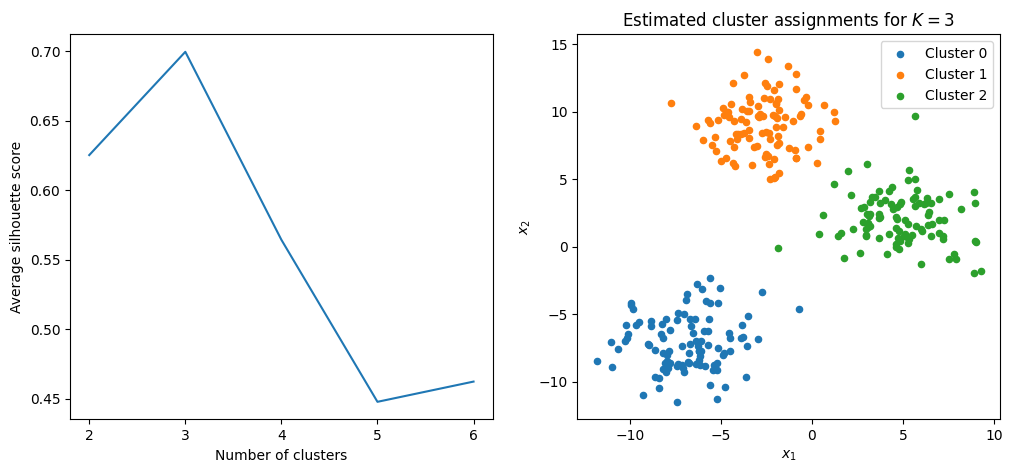

In [17]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from sklearn.datasets import make_blobs
import matplotlib.pylab as plt


X, clusters = make_blobs(n_samples=300, n_features=2, centers=3, random_state=42, cluster_std=2)
df = pd.DataFrame(X, columns=["x_1", "x_2"])

scores = []
max_clusters = 7
for n_cluster in range(2, max_clusters): 
    kmeans = KMeans(n_clusters = n_cluster, n_init = "auto", random_state = 42)
    kmeans.fit(X)
    silhouette_scores = silhouette_samples(X, kmeans.labels_, metric = "euclidean")
    scores.append(silhouette_scores.mean())

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].plot(scores)
axs[0].set_xticks([0, 1, 2, 3, 4], ["2", "3", "4", "5", "6"])
axs[0].set_xlabel("Number of clusters")
axs[0].set_ylabel("Average silhouette score")


kmeans = KMeans(n_clusters=3, n_init = "auto")
kmeans.fit(X)
df.loc[:, "cluster"] = kmeans.labels_
for i in range(3):
    df[df.cluster == i].plot.scatter(x = "x_1", y = "x_2", c = colors[i], ax = axs[1], label = f"Cluster {i}")
axs[1].set_xlabel(r"$x_1$")
axs[1].set_ylabel(r"$x_2$")
axs[1].set_title(r"Estimated cluster assignments for $K=3$")

plt.show()

Eine noch differenzierte graphische Betrachtung der Clusteringgüte kann generiert werden, wenn man je geschätzten Cluster die Silhouetten Scores in aufsteigender Reihenfolge visualisiert. So können wir sehen, in welchen Clustern es zu den höchsten Scores kommt und in welchen Clustern gegenenfalls einzelne weniger gute Zuordnungen statt finden. Wir betrachten auch hierzu die passende Grafik für unser Beispiel und sehen, dass der Cluster im linken unteren Eck die höchsten Silhouetten Scores aufweist. Dies macht Sinn, da er weiter von den anderen beiden Clustern entfernt ist, wodurch eine bessere Abgrenzung zustande kommt. Zudem sehen wir dass für den Cluster in der Mitte ein negativer Silhouette Score realisiert wird. Hierbei handelt es sich um den einzelnen Datenpunkt, der sehr nahe zum Cluster in der linken Ecke ist. Die Idee des Silhouette Scores kann natürlich auch für andere Distanzmaße angepasst werden. Zudem können andere Kennzahle für die Evaluation der Clusterzuordnung zu Rate gezogen werden. Die Funktionsweise der meisten Kennzahlen ist jedoch im Prinzip ähnlich zur Silhouette Score, weshalb wir auf weitere Darstellungen verzichten.

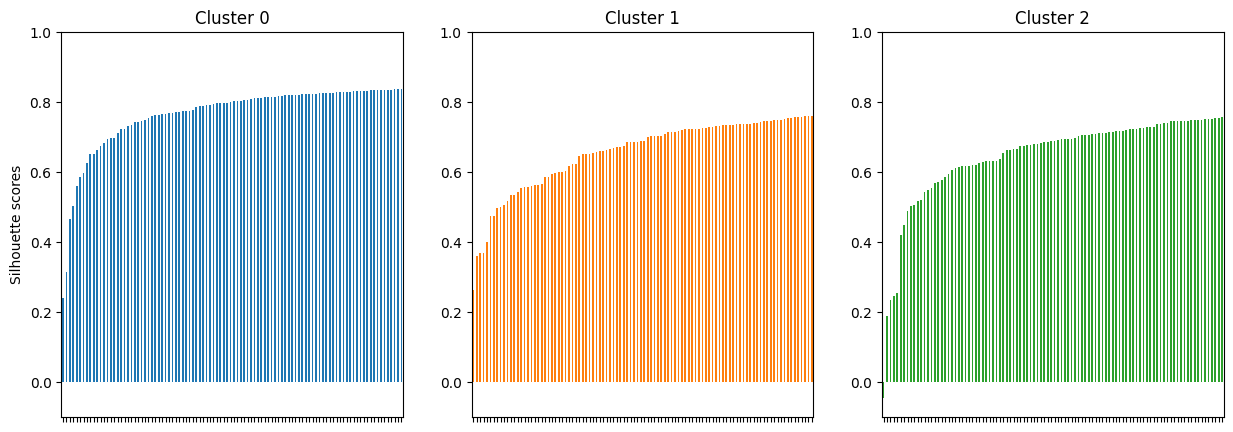

In [18]:
distances = euclidean_distances(X)
silhouette_samples(distances, kmeans.labels_)
df.loc[:, "silhouette_scores"] = silhouette_samples(distances, df.cluster.values)


fig, axs = plt.subplots(1, 3, figsize = (15, 5))
for i in range(3):
    df[df.cluster == i].sort_values(by = "silhouette_scores").plot.bar(y = "silhouette_scores", ax = axs[i], legend = False, title = f"Cluster {i}", color = colors[i])
    xticks = axs[i].get_xticks()
    axs[i].set_xticklabels([""]*len(xticks))
    axs[i].set_ylim((-0.1, 1))
axs[0].set_ylabel("Silhouette scores")
plt.show()

## Hierarchisches Clustering

Um einen Einblick zu erhalten, wie Cluster auf alternative Art gebildet werden können, betrachten wir noch das hierarchische Clustering. Hierbei wird zu Beginn jede Beobachtung als Cluster interpretiert. Im Laufe des Algorithmus werden möglichst ähnliche Beobachtungen zu neuen Clustern zusammengeführt (während die ursprünglichen Cluster dieser Beobachtungen nicht mehr als existente Cluster betrachtet werden) bis die Anzahl der gewünschten Cluster erreicht ist. Die Gemeinsamkeit zum K-means Clustering besteht somit in der notwendigen Festlegung der Clusteranzahl. Im Unterschied zum K-means Clustering entstehen die Cluster nicht durch direkte Minimierung einer Zielfunktion, sondern durch sukzessives Zusammenführen der bestehenden Cluster. Je nach Art der Zusammenführung kann dies equivalent zur Minimierung sein, dennoch ist die Vorgehensweise unterschiedlich. 

Betrachten wir in der unteren Zelle fünf Beobachtungen und deren paarweise euklidischen Abstände. Im ersten Schritt ist es relativ einfach zu sehen, dass die beiden Cluster (Beobachtungen) mit dem Indizes $0$ und $1$ den geringsten Abstand haben, womit aus diesen beiden Punkten ein neuer Cluster entsteht. Nach diesem Schritt hat man somit $4$ Cluster. Drei mit je einer Beobachtung und einen Cluster mit den beiden Beobachtungen $0, 1$. 

In [9]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import euclidean_distances


colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
X, clusters = make_blobs(n_samples=300, n_features=2, centers=3, random_state=42, cluster_std=2)
df = pd.DataFrame(X, columns=["x_1", "x_2"])

print("Observations:")
print(df.head())
print("")
print("Pairwise euclidean distances:")
print(pd.DataFrame(euclidean_distances(X[:5]), columns = list(range(5))))

Observations:
         x_1       x_2
0  -7.798349 -8.579798
1  -8.600454 -7.649221
2  -0.864108  6.572599
3   4.204516  4.170723
4 -10.955876 -8.896282

Pairwise euclidean distances:
           0          1          2          3          4
0   0.000000   1.228555  16.663698  17.511270   3.173348
1   1.228555   0.000000  16.189849  17.426369   2.665179
2  16.663698  16.189849   0.000000   5.608918  18.469707
3  17.511270  17.426369   5.608918   0.000000  20.014598
4   3.173348   2.665179  18.469707  20.014598   0.000000


Um nun die Ähnlichkeit zwischen Clustern zu bestimmen, die mehr als eine Beobachtung enthalten, muss definiert werden, wie dieser Schritt durchgeführt wird. Hierzu existiert das Konzept der Linkage, welche unterschiedliche Definitionen zur Bestimmung von Clusterähnlichkeit bereit stellt. Beispiele für unterschiedliche Arten der Linkage-Bestimmung wären:

* Single: Wähle den kleinsten paarweisen Abstand zwischen Beobachtungen $i$ des Cluster $k$ und Beobachtungen $j$ des Cluster $\tilde{k}$
* Complete: Wähle den größten paarweisen Abstand zwischen Beobachtungen $i$ des Cluster $k$ und Beobachtungen $j$ des Cluster $\tilde{k}$
* Average: Bestimme den Durchschnitt aller paarweisen Abstände zwischen Beobachtungen $i$ des Cluster $k$ und Beobachtungen $j$ des Cluster $\tilde{k}$

Mit einer gewählten Linkage-Definition, wird der Algorithmus des hierarschischen Clusterings im Allgemeinen wie folgt beschrieben:

```{prf:algorithm} Hierarchisches Clustering
1. Jede Beobachtung wird zu Beginn als Cluster interpretiert.
2. Führe folgende Schritte für ein gewähltes Abstands- und Linkagemaß solange durch, bis sich $K$ Cluster gebildet worden sind:
    1. Bestimme für alle Cluster die paarweisen Cluster Linkages.
    2. Führe die beiden Cluster mit der geringsten Linkage zu einem Cluster zusammen. 
```

Für ein besseres Verständnis betrachten wir das hierarchische Clustering für die fünf Datenpunkte des Beispiels und der Single-Linkage Schritt für Schritt.

Schritt 1: Fünf Beobachtungen, jede wird als Cluster gezählt, wir haben fünf Cluster mit je einer Beobachtung: 

$$
C_0 = \lbrace \boldsymbol{x}_0 \rbrace, C_1 = \lbrace \boldsymbol{x}_1 \rbrace, C_2 = \lbrace \boldsymbol{x}_2 \rbrace, C_3 = \lbrace \boldsymbol{x}_3 \rbrace, C_4 = \lbrace \boldsymbol{x}_4 \rbrace
$$

Schritt 2: Zusammenführen der Beobachtungen $i=0$ und $i=1$ zu Cluster mit Index $i=5$, da diese mit $1.23$ den geringsten euklidischen Abstand haben. Der neue Cluster hat $2$ Beobachtungen und den Index $i=5$: wir erhalten folgende Cluster: 

$$
C_2 = \lbrace \boldsymbol{x}_2 \rbrace, C_3 = \lbrace \boldsymbol{x}_3 \rbrace, C_4 = \lbrace \boldsymbol{x}_4 \rbrace, C_5 = \lbrace \boldsymbol{x}_1, \boldsymbol{x}_2 \rbrace
$$

Schritt 3: Im obigen Beispiel verwenden wir die Single Linkage Methode, um die Cluster zusammenzuführen. Daher müssen wir lediglich überprüfen, welche nächsten beiden Werte den geringsten Abstand haben. Dies trifft auf die ursprünglichen Beobachtungen $i=1, i=4$ mit einem Abstand von $2.67$ zu. Da $i=1$ bereits in den neuen Cluster mit Index $i = 5$ enthalten ist, müssen wir diesen Cluster mit Beobachtung $i=4$ zusammenführen. Es entsteht ein neuer Cluster aus den Clustern $C_4, C_5$ dessen Index $i=6$ ist. 

$$
C_2 = \lbrace \boldsymbol{x}_2 \rbrace, C_3 = \lbrace \boldsymbol{x}_3 \rbrace, C_6 = \lbrace \boldsymbol{x}_1, \boldsymbol{x}_2, \boldsymbol{x}_4 \rbrace
$$

Schritt4: Der nächste kleinste euklidische Abstand wäre der Wert $3.17$ zwischen den ursprünglichen Beobachtungen $i=0, i=4$. Diese sind bereits durch den vorherigen Schritt im Cluster $C_6$ verbunden, weshalb wir gleich zum nächsten kleineren Wert mit $5.61$ springen. Dieser bezieht sich auf die ursprünglichen Beobachtungen $i=2, i=3$, welche noch nicht in einem Cluster sind, daher entsteht aus diesen beiden Beobachtungen der neue Cluster $C_7$.

$$
C_6 = \lbrace \boldsymbol{x}_1, \boldsymbol{x}_2, \boldsymbol{x}_4 \rbrace, C_7 = \lbrace \boldsymbol{x}_2, \boldsymbol{x}_3 \rbrace
$$

Schritt 5: Der nächste kleinste euklidische Abstand ist der Wert $16.19$ zwischen den ursprünglichen Beobachtungen $i=1, i=3$. Da diese Beobachtungen in unterschiedlichen Clustern $C_6, C_7$ sind, werden diese im letzten Schritt zum Cluster mit allen Beobachtungen zusammengeführt.

Eine visuelle Form des hierarchischen Clusterings ist durch Dendogramme gegeben, welche die paarweisen Zusammführungen visualisieren. Im der nächsten Grafik sehen wir die fünf Beobachtungen unseres Beispiels sowie das zugehörige Dendogramm der Schritte 1-5. Mit einer gewünschten Clusteranzahl, können die Cluster aus der Information des Dendogramms extrahiert werden. Wird das Dendogramm wie bei uns von unten nach oben visualisiert, so resultieren $K$ Cluster durch einen horizontalen Schnitt durch das Dendogramm, so dass $K$ getrennte Äste bestehen bleiben.

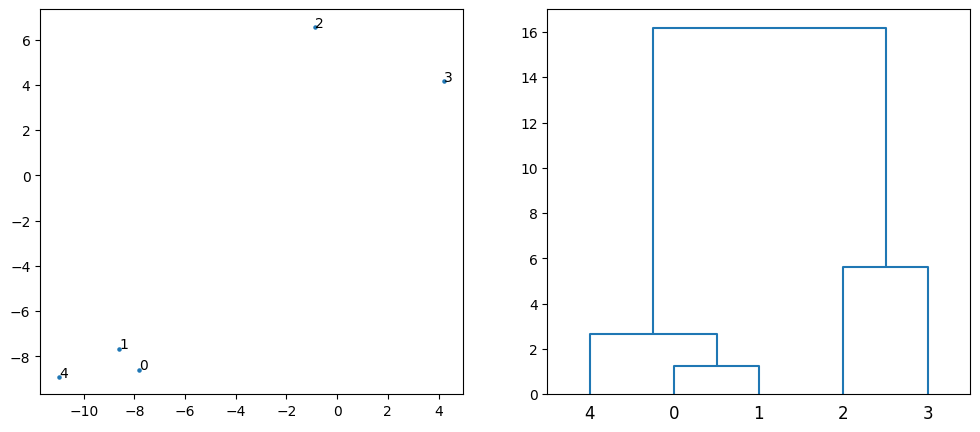

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
import matplotlib.pylab as plt
import pandas as pd


colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
X, clusters = make_blobs(n_samples=300, n_features=2, centers=3, random_state=42, cluster_std=2)
df = pd.DataFrame(X, columns=["x_1", "x_2"])

fig, axs = plt.subplots(1, 2, figsize = (12, 5))
axs[0].scatter(X[:5, 0], X[:5, 1], s = 5)
for i in range(5):
    axs[0].text(X[i, 0], X[i, 1], i)
Z = linkage(X[:5], method = "single")
dendrogram(Z, color_threshold = 0,  ax = axs[1])
plt.show()

Sowohl die Clusteranzahl wie die gewählte Linkage Definition beeinflussen das Clustering. Hierzu betrachten wir die gefundenen Cluster für die bereits beim K-means Clustering verwendeten Daten mit $K=3$ und den im sklearn Modul zur Verfügung gestellten Varianten der Linkagebestimmung. Wir können durchaus zum Teil deutliche Unterschiede feststellen. Insbesondere unter Verwendung der Single-Linkage entsteht eine Aufteilung, die sich deutlich von der ursprünglich generierten Aufteilung unterscheidet. Eine derartige Sensitivität ist eher als Nachteil zu werten und sollte für den Umgang mit realen Daten betrachtet werden. Andererseits bleiben die Clusterzuteilungen bei gewählter Linkage immer identisch. Dies ist hingegen beim K-means Algorithmus nicht der Fall, da mit jedem Durchlauf des Algorithmus für die gleichen Daten neue Cluster gefunden werden können. Die Ursache für dieses Verhalten besteht in der randomisierten Clusterzuteilung zu Beginn des Clusteringprozesses beim K-means Clustering.

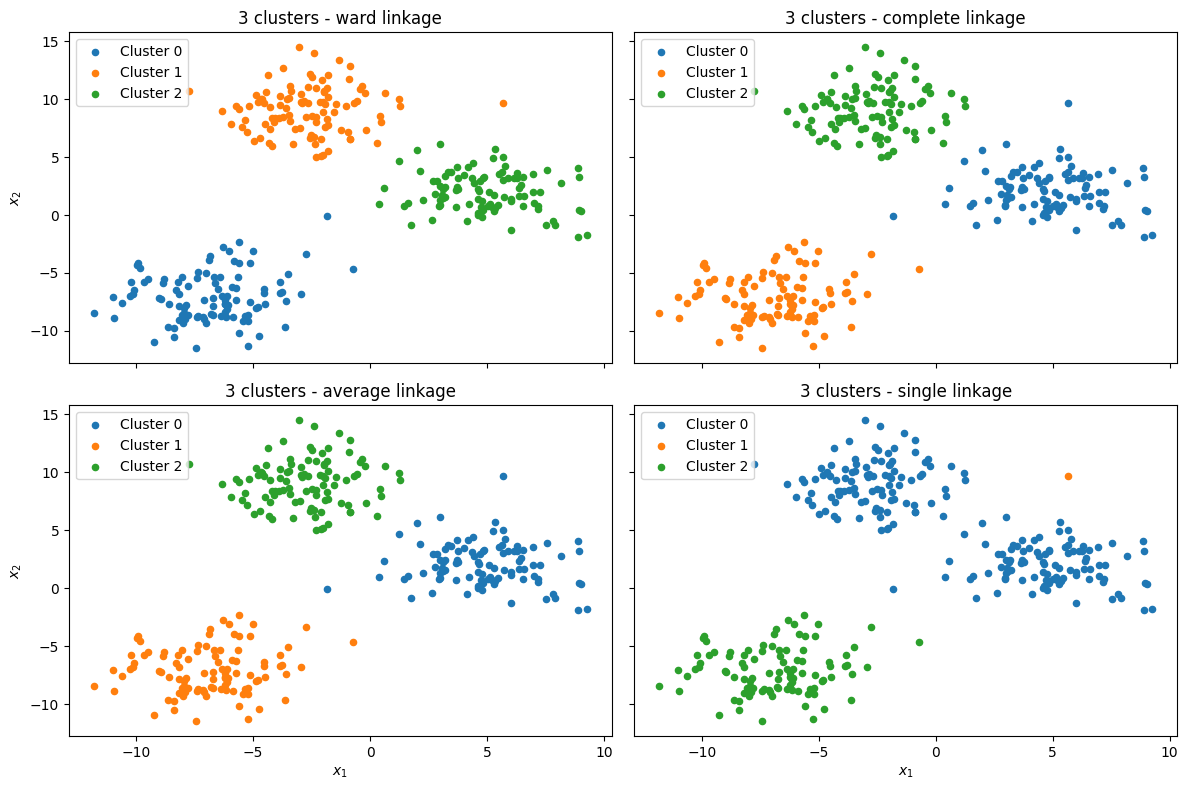

In [11]:
from sklearn.cluster import AgglomerativeClustering


linkages = ["ward", "complete", "average", "single"]
idx = {0: (0, 0), 1: (0, 1), 2: (1, 0), 3: (1, 1)}

fig, axs = plt.subplots(2, 2, figsize = (12, 8), sharex = True, sharey = True)

for l, linkage in enumerate(linkages):
    hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, linkage = linkage)
    hierarchical_cluster.fit(X)
    hierarchical_cluster.labels_


    df.loc[:, "cluster"] = hierarchical_cluster.labels_
    for i in range(3):
        df[df.cluster == i].plot.scatter(x = "x_1", y = "x_2", c = colors[i], ax = axs[idx[l]], label = f"Cluster {i}")
    axs[idx[l]].set_xlabel(r"$x_1$")
    axs[idx[l]].set_ylabel(r"$x_2$")
    axs[idx[l]].set_title(f"3 clusters - {linkage} linkage")

fig.tight_layout()

Neben dem K-means und dem hierarchischen Clustering existieren weitere Clustermethoden. Unter anderem gilt der HDBSCAN Algorithmus als heutiger State-of-the-Art. Da dieser als Weiterentwicklung des DBSCAN Algorithmus interpretiert werden kann, wäre es sinnvoll sich beide Algorithmen im Selbststudium oder einer anderen Veranstaltung anzusehen. Ein wesentlicher Unterschied dieser beiden Algorithmen ist die Möglichkeit Beobachtungen als Outlier zu identifizieren und keinen Cluster zuzuordnen. Diese Möglichkeit ist weder beim K-means noch beim hierarchischen Clustering gegeben, da hierbei immer alle Beobachtungen Clustern zugeordnet werden. Allerdings kann deswegen nicht davon ausgegangen werden, dass ein bestimmter Algorithmus die übrigen Methoden dominiert. Die passende Wahl des Clusteralgorithmus richtet sich immer nach den gegebenen Daten und dem Ziel des Clusterings. Zudem macht es Sinn mehrere Methoden für den selben Datensatz zu vergleichen, um einschätzen zu können, wie sehr das gewählte Modell die Zuordnung und somit die eigene Analyse beeinflusst. 